In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML

In [157]:
# For TOKENS
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1]
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]

In [158]:
TOKENS = pd.read_csv('CORPUS.csv').set_index(OHCO).sort_index()
VOCAB = pd.read_csv('VOCAB.csv').set_index('term_str').sort_index()
LIB = pd.read_csv('LIB.csv').set_index('book_id')[['author','title']].sort_index()
BOW = pd.read_csv('BOW_2.csv').set_index(['book_id','chap_num','term_str']).sort_index()

In [159]:
BOW

n     tfidf
book_id chap_num term_str              
1       1        111        1  0.000593
                 130        1  0.000593
                 22nd       2  0.001186
                 3          1  0.000593
                 33         1  0.000593
...                        ..       ...
6       9        you       54  0.000000
                 young      4  0.000618
                 your       8  0.000079
                 yule       2  0.002472
                 ã          1  0.000260

[91957 rows x 2 columns]

In [160]:
LIB['author_id'] = LIB.author.str.split(', ').str[0]

In [161]:
LIB['title_short'] = LIB.author_id + ' ' + LIB.index.astype('str') + ': ' + LIB.title.str[:25] 

In [162]:
LIB

author                  title         author_id  \
book_id                                                              
1        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
2        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
3        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
4        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
5        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
6        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   

                                       title_short  
book_id                                             
1        J. R. R. Tolkien 1: The Lord of the Rings  
2        J. R. R. Tolkien 2: The Lord of the Rings  
3        J. R. R. Tolkien 3: The Lord of the Rings  
4        J. R. R. Tolkien 4: The Lord of the Rings  
5        J. R. R. Tolkien 5: The Lord of the Rings  
6        J. R. R. Tolkien 6: The Lord of the Rings

## Sentiment VOCAB_SENT

In [163]:
SALEX = pd.read_csv('salex_nrc.csv').set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [164]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)
V

n         p          i      dfidf porter_stem max_pos  \
term_str                                                              
abandon       7  0.000015  16.048414  18.161341     abandon      NN   
abandoned     3  0.000006  17.270806  13.107701     abandon     VBN   
abominable    6  0.000013  16.270806  20.215403      abomin      JJ   
absence       7  0.000015  16.048414  20.215403      absenc      NN   
abundant      1  0.000002  18.855769   5.954196       abund      NN   
...         ...       ...        ...        ...         ...     ...   
yearning      1  0.000002  18.855769   5.954196       yearn     VBG   
yell         12  0.000025  15.270806  25.058442        yell      NN   
yelp          4  0.000008  16.855769  13.107701        yelp      NN   
young       121  0.000255  11.936906  27.555489       young      JJ   
youth        11  0.000023  15.396337  26.322682       youth      NN   

           max_pos_group  stop  anger  anticipation  disgust  fear  joy  \
term_str                                                                  
abandon               NN     0      0             0        0     1    0   
abandoned             VB     0      1             0        0     1    0   
abominable            JJ     0      0             0        1     1    0   
absence               NN     0      0             0        0     1    0   
abundant              NN     0      0             0        0     0    1   
...                  ...   ...    ...           ...      ...   ...  ...   
yearning              VB     0      0             1        0     0    1   
yell                  NN     0      1             0        0     1    0   
yelp                  NN     0      1             0        0     1    0   
young                 JJ     0      0             1        0     0    1   
youth                 NN     0      1             1        0     1    1   

            negative  positive  sadness  surprise  trust  sentiment  
term_str                                                             
abandon            1         0        1         0      0         -1  
abandoned          1         0        1         0      0         -1  
abominable         1         0        0         0      0         -1  
absence            1         0        1         0      0         -1  
abundant           0         1        0         0      0          1  
...              ...       ...      ...       ...    ...        ...  
yearning           1         1        0         0      1          0  
yell               1         0        0         1      0         -1  
yelp               1         0        0         1      0         -1  
young              0         1        0         1      0          1  
youth              0         1        0         1      0          1  

[1463 rows x 19 columns]

In [165]:
SALEX

anger  anticipation  disgust  fear  joy  negative  positive  \
term_str                                                                   
abandon          0             0        0     1    0         1         0   
abandoned        1             0        0     1    0         1         0   
abandonment      1             0        0     1    0         1         0   
abduction        0             0        0     1    0         1         0   
aberration       0             0        1     0    0         1         0   
...            ...           ...      ...   ...  ...       ...       ...   
young            0             1        0     0    1         0         1   
youth            1             1        0     1    1         0         1   
zeal             0             1        0     0    1         0         1   
zealous          0             0        0     0    1         0         1   
zest             0             1        0     0    1         0         1   

             sadness  surprise  trust  sentiment  
term_str                                          
abandon            1         0      0         -1  
abandoned          1         0      0         -1  
abandonment        1         1      0         -1  
abduction          1         1      0         -1  
aberration         0         0      0         -1  
...              ...       ...    ...        ...  
young              0         1      0          1  
youth              0         1      0          1  
zeal               0         1      1          1  
zealous            0         0      1          1  
zest               0         0      1          1  

[3688 rows x 11 columns]

### Merge Vocab with BOW

In [166]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [167]:
BOW_SENT = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()
BOW_SENT

n     tfidf max_pos  anger  anticipation  \
book_id chap_num term_str                                               
1       1        abominable  1  0.000336      JJ    0.0           0.0   
                 abundant    1  0.000593      NN    0.0           0.0   
                 accident    1  0.000336      NN    0.0           0.0   
                 accusing    1  0.000593     VBG    1.0           0.0   
                 admirable   1  0.000435      JJ    0.0           0.0   
...                         ..       ...     ...    ...           ...   
6       9        wonderful   2  0.000850      NN    0.0           0.0   
                 word        1  0.000077      NN    0.0           0.0   
                 words       1  0.000030     NNS    1.0           0.0   
                 worn        1  0.000297      NN    0.0           0.0   
                 young       4  0.000618      JJ    0.0           1.0   

                             disgust  fear  joy  sadness  surprise  trust  \
book_id chap_num term_str                                                   
1       1        abominable      1.0   1.0  0.0      0.0       0.0    0.0   
                 abundant        0.0   0.0  1.0      0.0       0.0    0.0   
                 accident        0.0   1.0  0.0      1.0       1.0    0.0   
                 accusing        0.0   1.0  0.0      0.0       0.0    0.0   
                 admirable       0.0   0.0  1.0      0.0       0.0    1.0   
...                              ...   ...  ...      ...       ...    ...   
6       9        wonderful       0.0   0.0  1.0      0.0       1.0    1.0   
                 word            0.0   0.0  0.0      0.0       0.0    1.0   
                 words           0.0   0.0  0.0      0.0       0.0    0.0   
                 worn            0.0   0.0  0.0      1.0       0.0    0.0   
                 young           0.0   0.0  1.0      0.0       1.0    0.0   

                             sentiment  
book_id chap_num term_str               
1       1        abominable       -1.0  
                 abundant          1.0  
                 accident         -1.0  
                 accusing         -1.0  
                 admirable         1.0  
...                                ...  
6       9        wonderful         1.0  
                 word              1.0  
                 words            -1.0  
                 worn             -1.0  
                 young             1.0  

[11916 rows x 12 columns]

In [168]:
CORPUS = pd.read_csv('CORPUS.csv')

In [169]:
# DOC_SENT
import gensim

BAG = OHCO[:1] # BOOKS
DOCS = CORPUS.groupby(BAG)


def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument([str(w) for w in list_of_words], [i])
data = DOCS.term_str.apply(lambda x: list(x)).to_list()
data_for_training = list(tagged_document(data))
data_for_training[5][1]


[5]

In [170]:
data = DOCS.term_str.apply(lambda x: list(x)).to_list()

In [171]:
data_for_training = list(tagged_document(data))
data_for_training

[TaggedDocument(words=['chapter', 'one', 'a', 'long', 'expected', 'party', 'when', 'mr', 'bilbo', 'baggins', 'of', 'bag', 'end', 'announced', 'that', 'he', 'would', 'shortly', 'be', 'celebrating', 'his', 'eleventy', 'first', 'birthday', 'with', 'a', 'party', 'of', 'special', 'magnificence', 'there', 'was', 'much', 'talk', 'and', 'excitement', 'in', 'hobbiton', 'bilbo', 'was', 'very', 'rich', 'and', 'very', 'peculiar', 'and', 'had', 'been', 'the', 'wonder', 'of', 'the', 'shire', 'for', 'sixty', 'years', 'ever', 'since', 'his', 'remarkable', 'disappearance', 'and', 'unexpected', 'return', 'the', 'riches', 'he', 'had', 'brought', 'back', 'from', 'his', 'travels', 'had', 'now', 'become', 'a', 'local', 'legend', 'and', 'it', 'was', 'popularly', 'believed', 'whatever', 'the', 'old', 'folk', 'might', 'say', 'that', 'the', 'hill', 'at', 'bag', 'end', 'was', 'full', 'of', 'tunnels', 'stuffed', 'with', 'treasure', 'and', 'if', 'that', 'was', 'not', 'enough', 'for', 'fame', 'there', 'was', 'also'

In [172]:
data_for_training[5][1]

[5]

In [173]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)

In [174]:
model.build_vocab(data_for_training)

In [175]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [176]:
LIB

author                  title         author_id  \
book_id                                                              
1        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
2        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
3        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
4        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
5        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   
6        J. R. R. Tolkien  The Lord of the Rings  J. R. R. Tolkien   

                                       title_short  
book_id                                             
1        J. R. R. Tolkien 1: The Lord of the Rings  
2        J. R. R. Tolkien 2: The Lord of the Rings  
3        J. R. R. Tolkien 3: The Lord of the Rings  
4        J. R. R. Tolkien 4: The Lord of the Rings  
5        J. R. R. Tolkien 5: The Lord of the Rings  
6        J. R. R. Tolkien 6: The Lord of the Rings

In [177]:
DOC_SENT = pd.DataFrame( model.dv.get_normed_vectors(), index=LIB.title_short)

In [178]:
DOC_SENT

0         1         2   \
title_short                                                               
J. R. R. Tolkien 1: The Lord of the Rings -0.203300  0.004517 -0.040500   
J. R. R. Tolkien 2: The Lord of the Rings -0.220669 -0.346927 -0.057019   
J. R. R. Tolkien 3: The Lord of the Rings  0.003089  0.132238 -0.348447   
J. R. R. Tolkien 4: The Lord of the Rings  0.019167  0.162786 -0.371885   
J. R. R. Tolkien 5: The Lord of the Rings  0.098846  0.005021 -0.214009   
J. R. R. Tolkien 6: The Lord of the Rings -0.329434 -0.198853  0.002255   

                                                 3         4         5   \
title_short                                                               
J. R. R. Tolkien 1: The Lord of the Rings  0.249870 -0.044750  0.037063   
J. R. R. Tolkien 2: The Lord of the Rings -0.089443  0.026033 -0.235494   
J. R. R. Tolkien 3: The Lord of the Rings  0.175585  0.155560  0.047233   
J. R. R. Tolkien 4: The Lord of the Rings  0.318835 -0.259523  0.002965   
J. R. R. Tolkien 5: The Lord of the Rings  0.108994  0.366047 -0.044494   
J. R. R. Tolkien 6: The Lord of the Rings  0.197652  0.135956 -0.001417   

                                                 6         7         8   \
title_short                                                               
J. R. R. Tolkien 1: The Lord of the Rings  0.003475  0.042657 -0.377273   
J. R. R. Tolkien 2: The Lord of the Rings -0.066577 -0.023150 -0.082680   
J. R. R. Tolkien 3: The Lord of the Rings  0.107524 -0.100370 -0.033694   
J. R. R. Tolkien 4: The Lord of the Rings -0.143212  0.060211 -0.128528   
J. R. R. Tolkien 5: The Lord of the Rings -0.097329 -0.279787 -0.242108   
J. R. R. Tolkien 6: The Lord of the Rings  0.067780 -0.018983 -0.096796   

                                                 9   ...        30        31  \
title_short                                          ...                       
J. R. R. Tolkien 1: The Lord of the Rings  0.119736  ...  0.215425  0.034074   
J. R. R. Tolkien 2: The Lord of the Rings -0.113727  ... -0.013565  0.040167   
J. R. R. Tolkien 3: The Lord of the Rings  0.169391  ...  0.384377 -0.126726   
J. R. R. Tolkien 4: The Lord of the Rings -0.012848  ...  0.179361  0.033589   
J. R. R. Tolkien 5: The Lord of the Rings  0.060380  ...  0.075859  0.074503   
J. R. R. Tolkien 6: The Lord of the Rings -0.017498  ...  0.139819 -0.003850   

                                                 32        33        34  \
title_short                                                               
J. R. R. Tolkien 1: The Lord of the Rings -0.121447  0.166075 -0.063457   
J. R. R. Tolkien 2: The Lord of the Rings -0.265676 -0.143126 -0.130416   
J. R. R. Tolkien 3: The Lord of the Rings -0.182770 -0.088726  0.212526   
J. R. R. Tolkien 4: The Lord of the Rings  0.178209 -0.210524  0.106667   
J. R. R. Tolkien 5: The Lord of the Rings -0.044209 -0.031177 -0.045829   
J. R. R. Tolkien 6: The Lord of the Rings  0.089795 -0.294201 -0.109302   

                                                 35        36        37  \
title_short                                                               
J. R. R. Tolkien 1: The Lord of the Rings  0.120987  0.282061 -0.116962   
J. R. R. Tolkien 2: The Lord of the Rings  0.203796 -0.042520 -0.404241   
J. R. R. Tolkien 3: The Lord of the Rings -0.208558 -0.166614 -0.257202   
J. R. R. Tolkien 4: The Lord of the Rings  0.118537 -0.032252 -0.099809   
J. R. R. Tolkien 5: The Lord of the Rings  0.016162  0.259631 -0.402917   
J. R. R. Tolkien 6: The Lord of the Rings  0.110911  0.010613 -0.130651   

                                                 38        39  
title_short                                                    
J. R. R. Tolkien 1: The Lord of the Rings -0.019662 -0.098119  
J. R. R. Tolkien 2: The Lord of the Rings -0.023006 -0.013998  
J. R. R. Tolkien 3: The Lord of the Rings -0.046229 -0.020618  
J. R. R. Tolkien 4: The Lord of the Rings -0.250782 -0.109308  
J. R. R. Tolkien 5:

In [179]:
print(LIB.columns)

Index(['author', 'title', 'author_id', 'title_short'], dtype='object')


In [180]:
pip install hac2

ERROR: Could not find a version that satisfies the requirement hac2 (from versions: none)
ERROR: No matching distribution found for hac2
Note: you may need to restart the kernel to use updated packages.


In [227]:
X

x          y     n         p          i      dfidf  \
term_str                                                               
a        -18.946957  14.769897  9078  0.019135   5.707610   0.000000   
about     -5.362070  15.336842   845  0.001781   9.132961   0.000000   
above    -36.213703   7.207236   350  0.000738  10.404558   5.580488   
across   -30.488213  -3.387624   170  0.000358  11.446378  15.517006   
afraid    26.260180  -2.970123   101  0.000213  12.197557  20.805445   
...             ...        ...   ...       ...        ...        ...   
your      33.869987 -12.570477  1122  0.002365   8.723912   2.838343   
yourself  28.375315   4.972495    68  0.000143  12.768306  30.023472   
ã         27.518795  -1.934918   137  0.000289  11.757737  32.597671   
éomer     19.826723 -15.042315   204  0.000430  11.183343  31.267141   
éowyn     15.491784 -11.482709    70  0.000148  12.726486  20.215403   

         porter_stem max_pos max_pos_group  stop  
term_str                                          
a                  a      DT            DT     1  
about          about      IN            IN     1  
above           abov      IN            IN     1  
across        across      IN            IN     0  
afraid        afraid      NN            NN     0  
...              ...     ...           ...   ...  
your            your    PRP$            PR     1  
yourself    yourself     PRP            PR     1  
ã                  ã      NN            NN     0  
éomer          éomer      NN            NN     0  
éowyn          éowyn      NN            NN     0  

[962 rows x 10 columns]

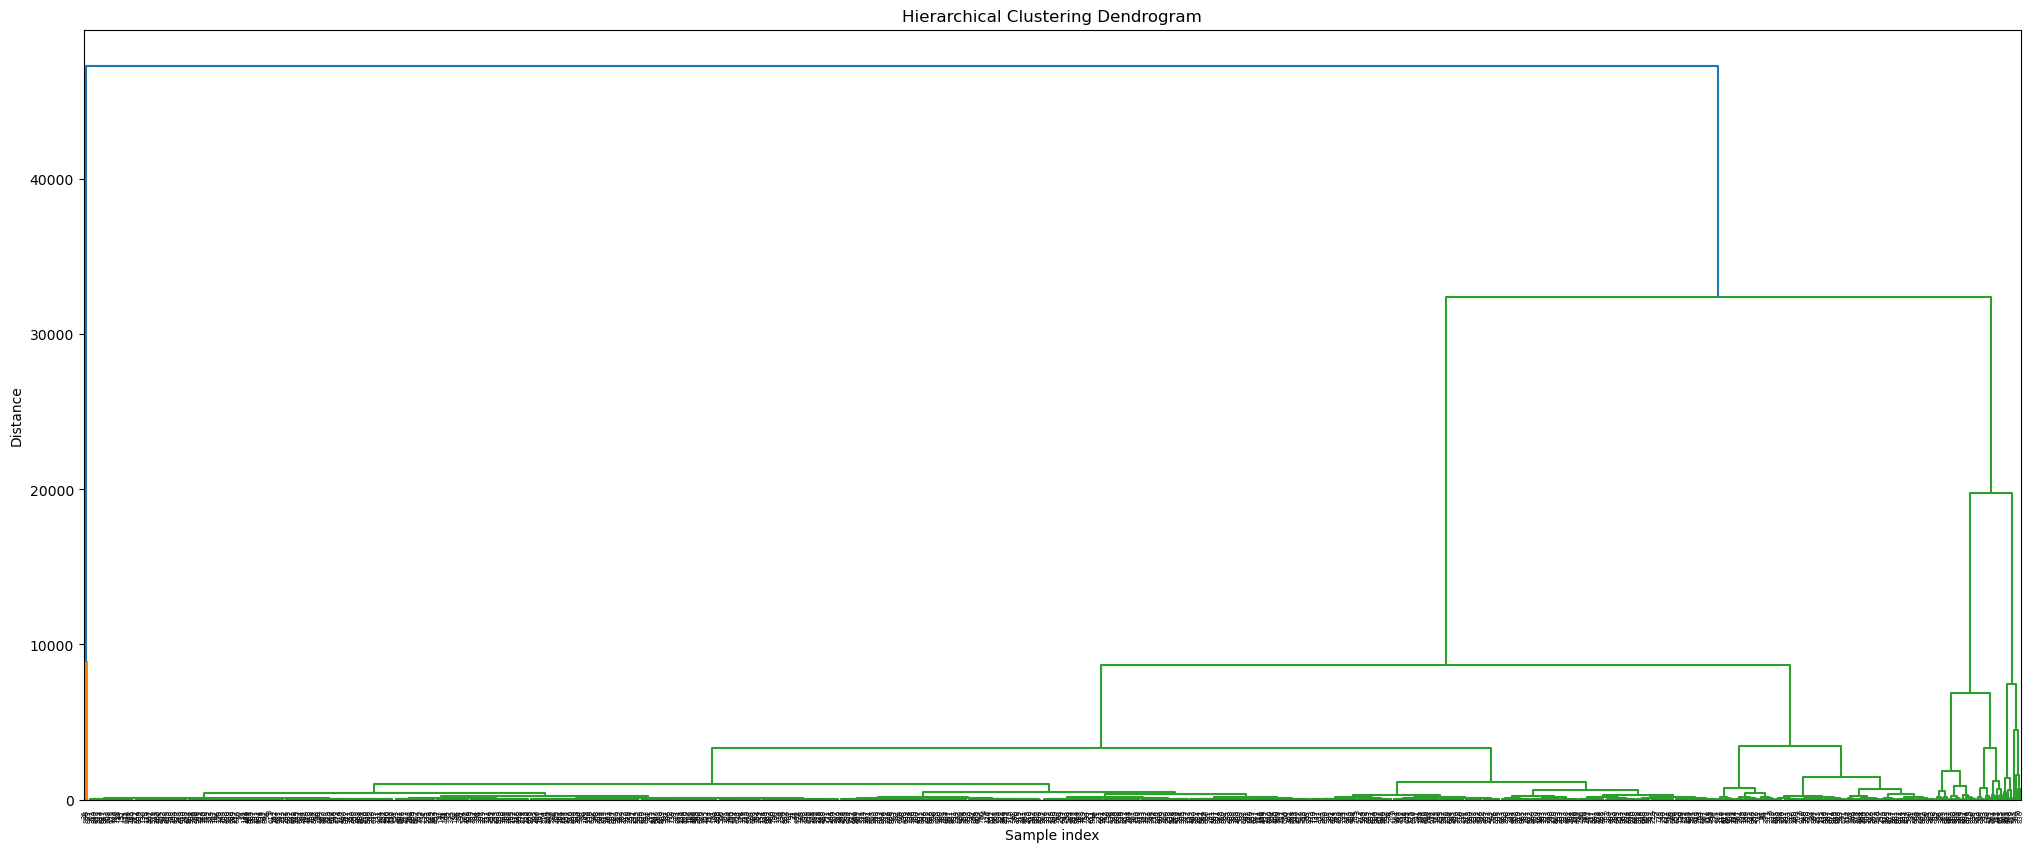

In [229]:
import pandas as pd


# Convert categorical data using one-hot encoding or similar methods
if X.select_dtypes(include=['object']).empty is False:
    X_encoded = pd.get_dummies(X)
else:
    X_encoded = X.copy()

# Check for missing values and fill or drop them
X_encoded.fillna(method='ffill', inplace=True)  # or use dropna()


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X_encoded, 'ward')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [182]:
for col in emo_cols:
    BOW_SENT[col] = BOW_SENT[col] * BOW_SENT.tfidf

In [183]:
BOW_SENT.head()

n     tfidf max_pos     anger  anticipation  \
book_id chap_num term_str                                                  
1       1        abominable  1  0.000336      JJ  0.000000           0.0   
                 abundant    1  0.000593      NN  0.000000           0.0   
                 accident    1  0.000336      NN  0.000000           0.0   
                 accusing    1  0.000593     VBG  0.000593           0.0   
                 admirable   1  0.000435      JJ  0.000000           0.0   

                              disgust      fear       joy   sadness  surprise  \
book_id chap_num term_str                                                       
1       1        abominable  0.000336  0.000336  0.000000  0.000000  0.000000   
                 abundant    0.000000  0.000000  0.000593  0.000000  0.000000   
                 accident    0.000000  0.000336  0.000000  0.000336  0.000336   
                 accusing    0.000000  0.000593  0.000000  0.000000  0.000000   
                 admirable   0.000000  0.000000  0.000435  0.000000  0.000000   

                                trust  sentiment  
book_id chap_num term_str                         
1       1        abominable  0.000000  -0.000336  
                 abundant    0.000000   0.000593  
                 accident    0.000000  -0.000336  
                 accusing    0.000000  -0.000593  
                 admirable   0.000435   0.000435

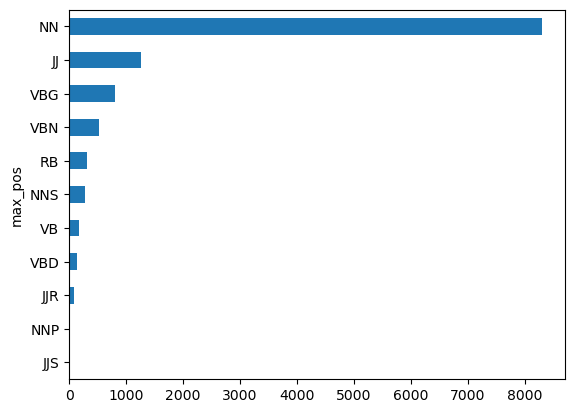

In [184]:
BOW_SENT.max_pos.value_counts().sort_values().plot.barh();


In [185]:
EMO_BOOKS = BOW_SENT.groupby(['book_id'])[emo_cols].mean()
EMO_CHAPS = BOW_SENT.groupby(['book_id','chap_num'])[emo_cols].mean()

In [186]:
EMO_BOOKS.index = LIB.title_short #book_title

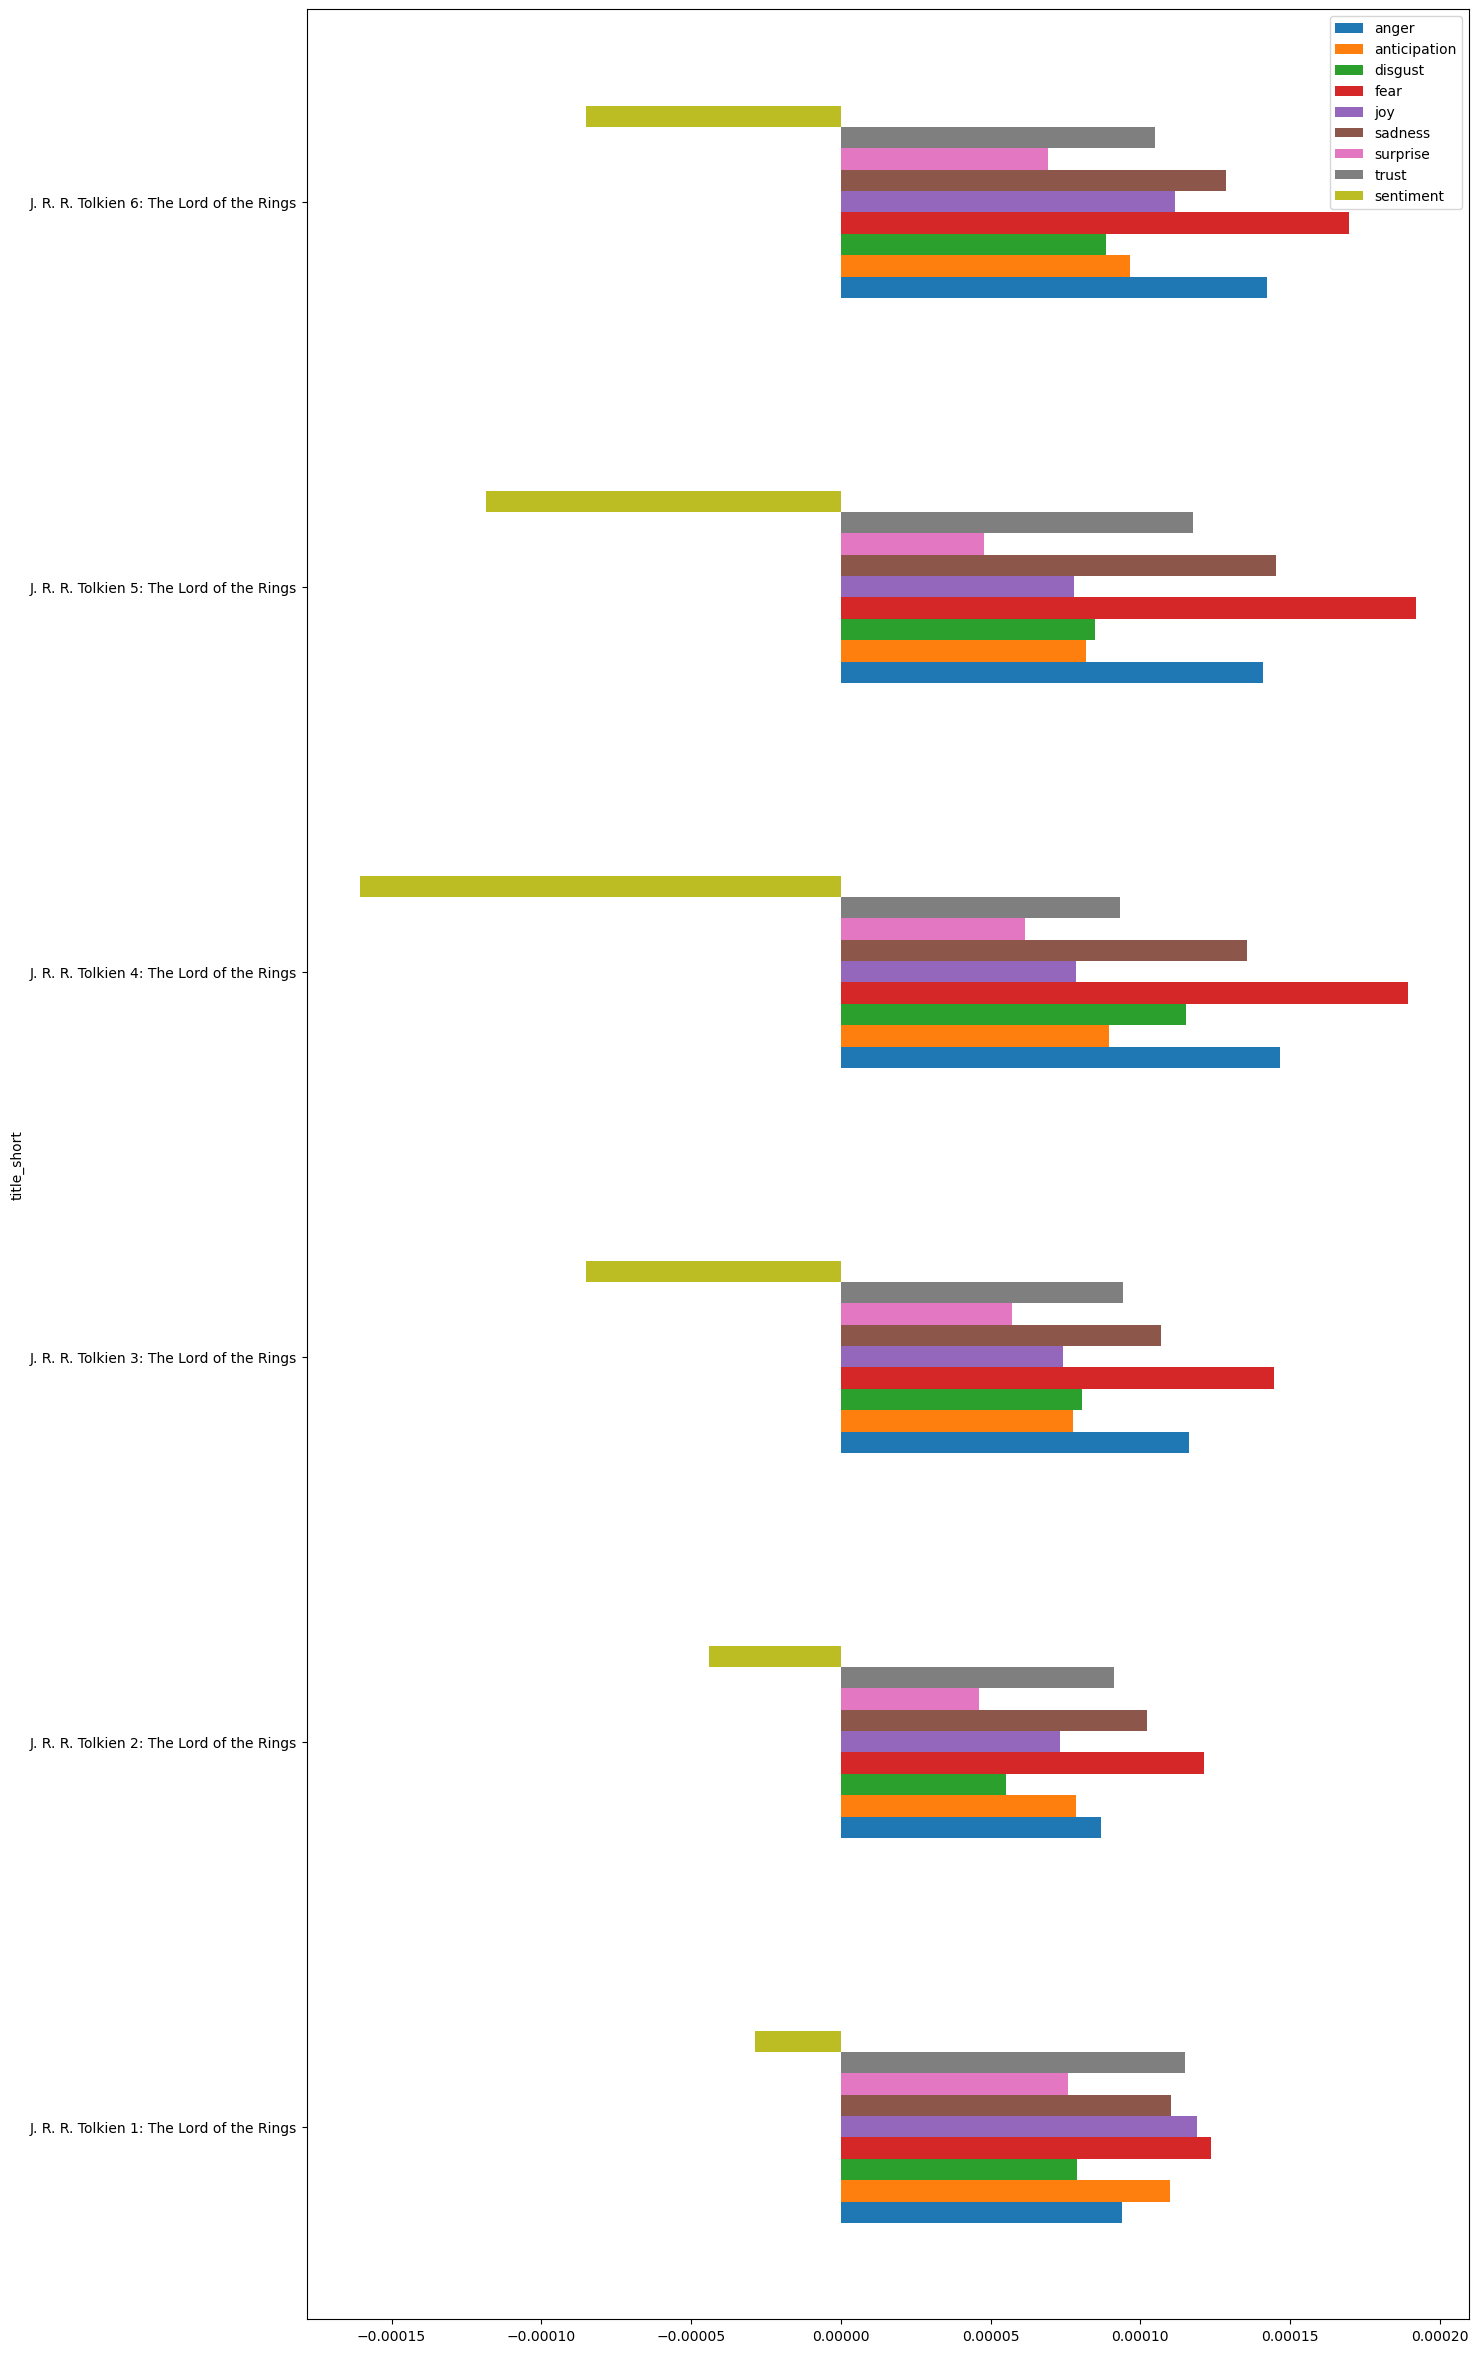

In [187]:
EMO_BOOKS.plot.barh(figsize=(15,30));

In [188]:
LOTR_chaps = EMO_CHAPS
LOTR_chaps.style.background_gradient(cmap='YlGnBu', axis=None)

In [189]:
book_id = 1  # or whatever book ID you need
LOTR_chaps_thin = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0: 'value', 'level_2': 'emo'})
LOTR_chaps_thin = LOTR_chaps_thin[LOTR_chaps_thin['book_id'] == book_id]

In [190]:
LOTR_chaps_thin

book_id  chap_num           emo     value
0          1         1         anger  0.000092
1          1         1  anticipation  0.000170
2          1         1       disgust  0.000074
3          1         1          fear  0.000089
4          1         1           joy  0.000194
..       ...       ...           ...       ...
103        1        12           joy  0.000061
104        1        12       sadness  0.000136
105        1        12      surprise  0.000046
106        1        12         trust  0.000072
107        1        12     sentiment -0.000152

[108 rows x 4 columns]

In [191]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

In [192]:
px.line(LOTR_chaps_thin, x='chap_num', y='value', color='emo')

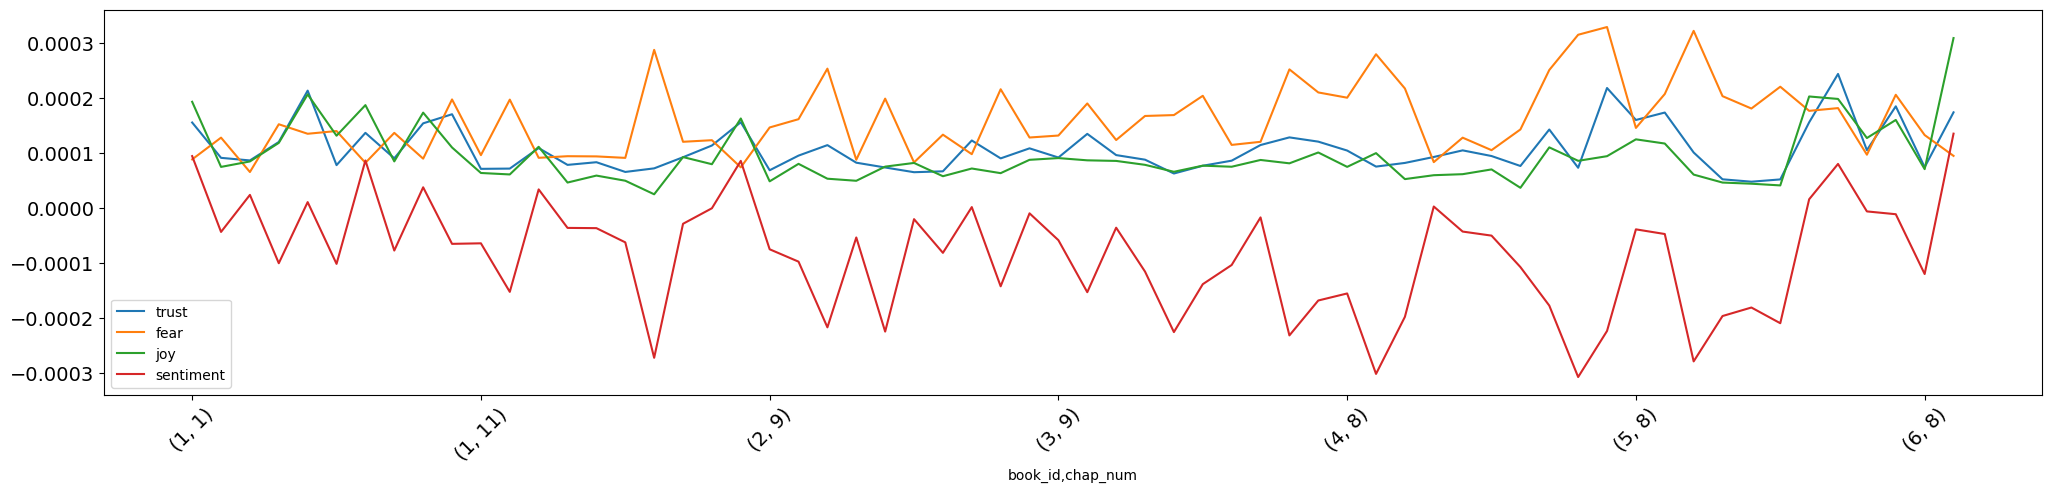

In [193]:
plot_sentiments(LOTR_chaps, ['trust','fear','joy','sentiment'])

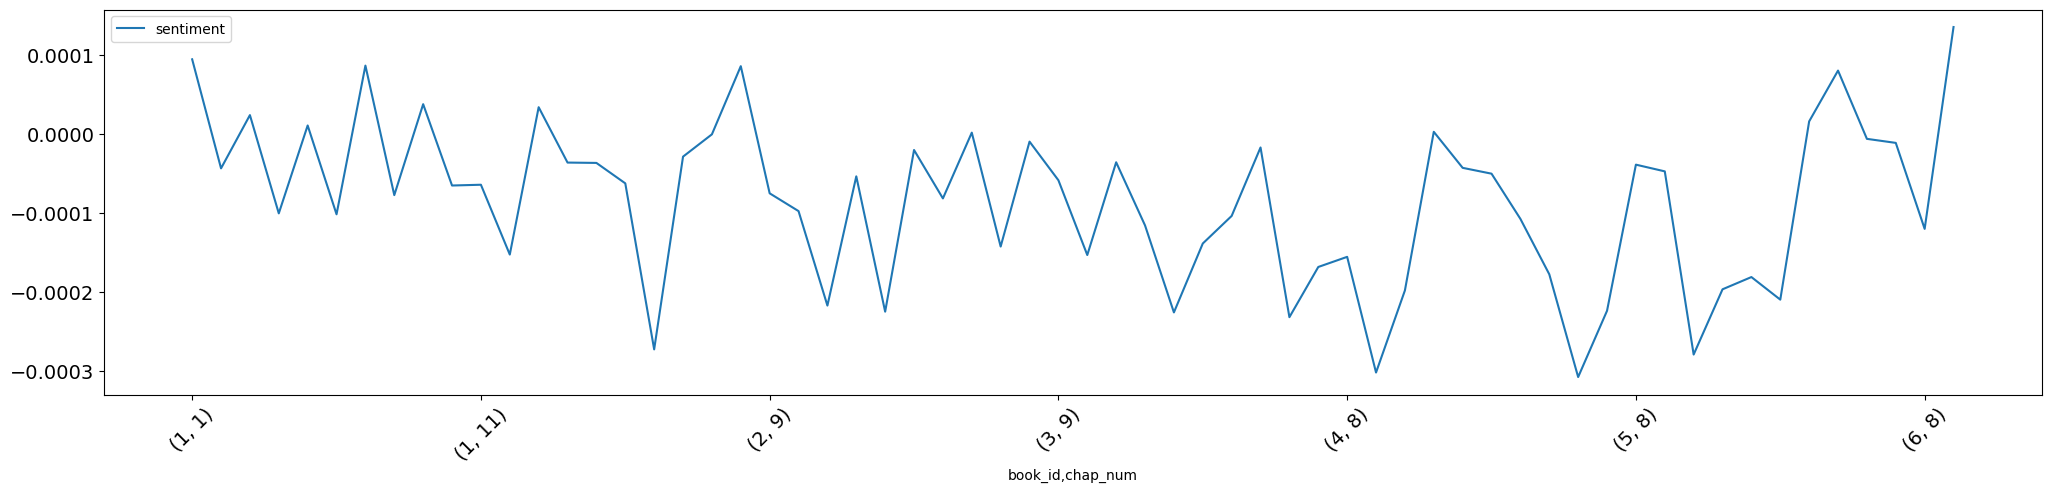

In [194]:
plot_sentiments(LOTR_chaps, ['sentiment'])


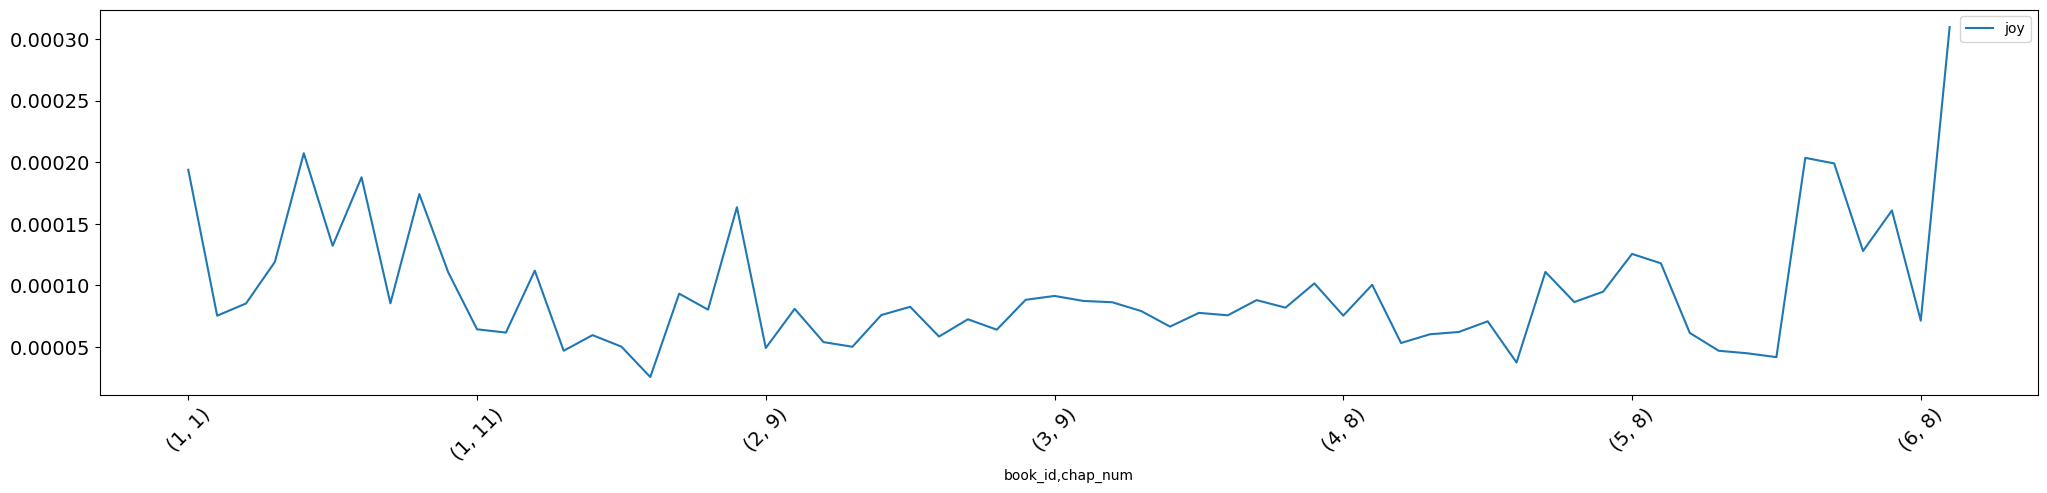

In [195]:
plot_sentiments(LOTR_chaps, ['joy'])

## VOCAB_W2V

In [196]:
data_prefix = 'novels'
OHCO = ['book_id', 'chapter_num', 'para_num', 'sent_num', 'token_num']
PARA = OHCO[:4] # Paragraphs
SENT = OHCO[:5] # Sentences
BAG = PARA

In [197]:
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50, # THIS LIMITS OUR VOCAB
    workers = 4
)

In [198]:
TOKENS

token_str  term_str  pos  \
book_id chap_num para_num sent_num token_num                            
1       1        0        0        0           CHAPTER   chapter   NN   
                                   1               ONE       one   CD   
                                   2                 A         a   DT   
                                   3              Long      long   RB   
                                   4          expected  expected  VBN   
...                                                ...       ...  ...   
6       9        15       66       2                 I         i  PRP   
                                   3                 m         m   NN   
                                   4              back      back   RB   
                                   5                he        he  PRP   
                                   6             said.      said   NN   

                                             pos_group            pos_tuple  
book_id chap_num para_num sent_num token_num                                 
1       1        0        0        0                NN    ('CHAPTER', 'NN')  
                                   1                CD        ('ONE', 'CD')  
                                   2                DT          ('A', 'DT')  
                                   3                RB       ('Long', 'RB')  
                                   4                VB  ('expected', 'VBN')  
...                                                ...                  ...  
6       9        15       66       2                PR         ('I', 'PRP')  
                                   3                NN          ('m', 'NN')  
                                   4                RB       ('back', 'RB')  
                                   5                PR        ('he', 'PRP')  
                                   6                NN      ('said.', 'NN')  

[474408 rows x 5 columns]

In [199]:
VOCAB = VOCAB[~VOCAB.index.isna()] # There is NaN in the index for some reason

In [200]:
VOCAB.sample(5)

n         p          i      dfidf porter_stem max_pos max_pos_group  \
term_str                                                                        
slung     6  0.000013  16.270806  20.215403       slung      NN            NN   
loped     1  0.000002  18.855769   5.954196        lope     VBD            VB   
hamlet    1  0.000002  18.855769   5.954196      hamlet      NN            NN   
corrupt   1  0.000002  18.855769   5.954196     corrupt      NN            NN   
models    1  0.000002  18.855769   5.954196       model     NNS            NN   

          stop  
term_str        
slung        0  
loped        0  
hamlet       0  
corrupt      0  
models       0

In [201]:
print(TOKENS.columns)

Index(['token_str', 'term_str', 'pos', 'pos_group', 'pos_tuple'], dtype='object')


In [202]:
print("Current index levels:", TOKENS.index.names)

Current index levels: ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']


In [203]:
docs = TOKENS[~TOKENS.pos.str.match('NNPS?')].dropna(subset=['term_str'])\
    .groupby(level=['book_id', 'chap_num', 'para_num', 'sent_num'])\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
docs = [doc for doc in docs if len(doc) > 1] # Lose single word docs

In [204]:
print(docs[:2])

[['chapter', 'one', 'a', 'long', 'expected'], ['bilbo', 'baggins', 'of', 'bag', 'end', 'announced', 'that', 'he', 'would', 'shortly', 'be', 'celebrating', 'his', 'eleventy', 'first', 'birthday', 'with', 'a', 'party', 'of', 'special', 'magnificence', 'there', 'was', 'much', 'talk', 'and', 'excitement', 'in', 'hobbiton']]


In [205]:
from gensim.corpora import Dictionary
vocab = Dictionary(docs)

In [206]:
# Generate Word Embedding
from gensim.models import word2vec

model = word2vec.Word2Vec(docs, **w2v_params)

In [207]:
model.wv.vectors

array([[ 2.1288887e-01, -1.5772778e-01,  2.3616511e-01, ...,
         2.9432225e-01,  8.3993614e-02, -5.2797269e-02],
       [-2.9298117e-02,  4.2954944e-02,  8.2029223e-02, ...,
        -1.0242406e-01, -1.7945299e-02, -1.3838321e-01],
       [ 1.3917370e-01, -5.2069064e-02,  9.7453818e-02, ...,
         1.7665538e-01, -3.9863624e-02, -4.3275931e-01],
       ...,
       [ 9.4209284e-02, -1.5665509e-01,  5.0529302e-03, ...,
         8.1710517e-02,  4.8859484e-02, -3.0131832e-02],
       [ 3.9867718e-02, -1.5752201e-01,  4.1612733e-02, ...,
        -5.2187681e-02,  3.7064008e-02, -6.1147384e-02],
       [ 6.7261212e-02, -1.4795865e-01,  2.1495067e-02, ...,
         8.0557205e-02,  5.0868511e-02,  2.0010956e-04]], dtype=float32)

In [208]:
def get_vector(row):
    w = row.name
    try:
        vec = model.wv[w]
    except KeyError as e:
        vec = None
    return vec

In [209]:
VOCAB_W2V = pd.DataFrame(VOCAB.apply(get_vector, axis=1).dropna()).apply(lambda x: pd.Series(x[0]), axis=1)

In [210]:
VOCAB_W2V

0         1         2         3         4         5    \
term_str                                                               
a         0.336526 -0.258948 -0.473044  0.272342 -0.151275  0.006834   
about     0.015896 -0.021593 -0.040306 -0.094801  0.250318  0.220901   
above     0.344333 -0.713341  0.030903  0.315342 -0.078300  0.052604   
across    0.163902 -0.313575  0.119572  0.197116 -0.110935 -0.104282   
afraid   -0.008022 -0.029534 -0.023577 -0.052395  0.089855 -0.075115   
...            ...       ...       ...       ...       ...       ...   
your     -0.009408  0.635615 -0.027622  0.352301  0.038072 -0.150270   
yourself  0.013787  0.060746 -0.052974 -0.010823  0.012114 -0.038594   
ã         0.071299  0.006860 -0.147175  0.022269 -0.011234  0.039972   
éomer    -0.010734 -0.066010  0.110474 -0.005582 -0.032876 -0.268644   
éowyn     0.007261 -0.103149  0.053384  0.061351  0.023008 -0.107196   

               6         7         8         9    ...       236       237  \
term_str                                          ...                       
a        -0.734452  0.110637  0.213092  0.323000  ...  0.239677  0.053885   
about    -0.318532 -0.180987 -0.231950  0.234318  ...  0.529861 -0.038364   
above    -0.191672 -0.434482 -0.601702  0.258388  ... -0.079722  0.110281   
across   -0.025999 -0.245473 -0.269316 -0.018477  ... -0.229361 -0.085557   
afraid   -0.124957  0.075342 -0.047312  0.111974  ...  0.188846 -0.000503   
...            ...       ...       ...       ...  ...       ...       ...   
your     -0.167991  0.575907  0.389151 -0.450533  ... -0.618091  0.032351   
yourself -0.046086  0.082514  0.037387 -0.068998  ... -0.004052  0.103971   
ã        -0.042264  0.107427  0.045638  0.008417  ...  0.022712  0.066358   
éomer    -0.169587 -0.042160 -0.040024  0.012358  ...  0.000582 -0.042276   
éowyn    -0.113069  0.009315 -0.114238 -0.004849  ... -0.097513 -0.010025   

               238       239       240       241       242       243  \
term_str                                                               
a        -0.163760  0.440282 -0.156274  0.161840 -0.684949  0.831717   
about     0.224500  0.037114  0.349703 -0.097259 -0.005088 -0.561576   
above     0.003361 -0.475796  0.003119  0.072272 -0.615324  0.052079   
across   -0.061631 -0.400961  0.000611 -0.017720 -0.251039  0.013829   
afraid   -0.046137  0.018147  0.165660 -0.134564  0.358760 -0.005673   
...            ...       ...       ...       ...       ...       ...   
your     -0.072665  0.354989  0.255893  0.409810  0.136565  0.546171   
yourself -0.038377  0.133651  0.037773 -0.050746  0.214512 -0.036511   
ã        -0.015228  0.158819  0.055445 -0.100921  0.246277 -0.015658   
éomer    -0.126042  0.055027  0.035632 -0.077863  0.264133  0.090221   
éowyn    -0.015088 -0.019892  0.010771 -0.012655  0.147228  0.049955   

               244       245  
term_str                      
a         0.031263  0.256171  
about    -0.141063 -0.523066  
above     0.241818 -0.102586  
across    0.006563 -0.104616  
afraid    0.016754 -0.063993  
...            ...       ...  
your     -0.332685 -0.198324  
yourself -0.033213 -0.094777  
ã         0.037139 -0.047757  
éomer    -0.293300 -0.145162  
éowyn    -0.036074 -0.049915  

[962 rows x 246 columns]

## Word2vec tSNE Plot 

In [211]:
from sklearn.manifold import TSNE as tsne
tsne_engine = tsne(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

In [212]:
tsne_model = tsne_engine.fit_transform(WV.to_numpy())

In [213]:
TSNE = pd.DataFrame(tsne_model, columns=['x','y'], index=WV.index)

In [214]:
TSNE

x          y
term_str                      
a        -18.946957  14.769897
about     -5.362070  15.336842
above    -36.213703   7.207236
across   -30.488213  -3.387624
afraid    26.260180  -2.970123
...             ...        ...
your      33.869987 -12.570477
yourself  28.375315   4.972495
ã         27.518795  -1.934918
éomer     19.826723 -15.042315
éowyn     15.491784 -11.482709

[962 rows x 2 columns]

In [215]:
X = TSNE.join(VOCAB, how='left')

In [216]:
import plotly.express as px

# Example adjustment, assuming 'n' column exists and you want to use it for sizing:
px.scatter(X.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos',  # Assuming 'max_pos' is what you meant by 'pos_max'
           hover_name='term_str',          
           size='n',  # Updated to use 'n' instead of 'tfidf_sum'
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

### DESCRIPTION: 

In [217]:
LIB_2 = pd.read_csv('LIB.csv')
LIB_2

book_id                  title                        part  \
0        1  The Lord of the Rings  The Fellowship of the Ring   
1        2  The Lord of the Rings  The Fellowship of the Ring   
2        3  The Lord of the Rings              The Two Towers   
3        4  The Lord of the Rings              The Two Towers   
4        5  The Lord of the Rings      The Return of the King   
5        6  The Lord of the Rings      The Return of the King   

             author  year_of_publish  
0  J. R. R. Tolkien  21 October 1954  
1  J. R. R. Tolkien  21 October 1954  
2  J. R. R. Tolkien    21 April 1955  
3  J. R. R. Tolkien    21 April 1955  
4  J. R. R. Tolkien   5 January 1956  
5  J. R. R. Tolkien   5 January 1956

## RIF 1

In [218]:
pip install hac

Note: you may need to restart the kernel to use updated packages.


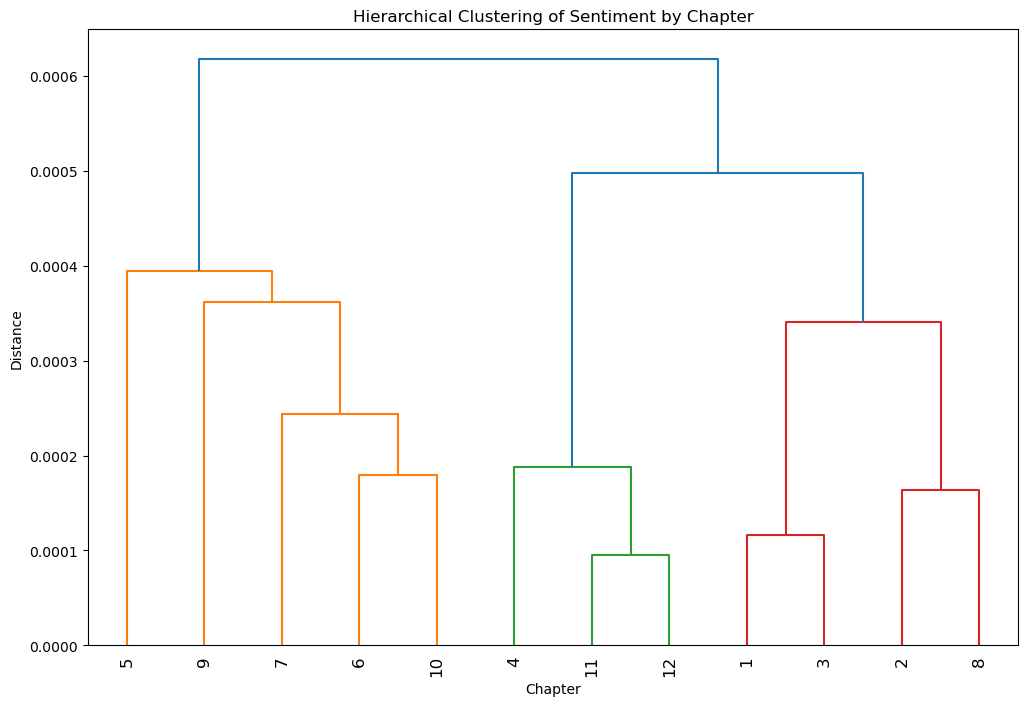

In [219]:
# Calculate average sentiment per chapter
EMO_CHAPS = BOW_SENT.groupby(['book_id', 'chap_num'])['sentiment'].mean().unstack(fill_value=0)

# Generate the linkage matrix for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(EMO_CHAPS.T, 'ward')

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=EMO_CHAPS.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering of Sentiment by Chapter')
plt.xlabel('Chapter')
plt.ylabel('Distance')
plt.show()

In [220]:
# Filter the BOW dataframe for the term 'ring' and plot its frequency
ring_counts = BOW[BOW.index.get_level_values('term_str') == 'ring'].reset_index()

# Create a scatter plot tracking 'ring' frequency across chapters
px.scatter(ring_counts, x='chap_num', y='n', color='book_id',
           labels={'n': 'Frequency of "ring"', 'chap_num': 'Chapter Number', 'book_id': 'Book ID'},
           title='Frequency of "Ring" Across Chapters in Each Book').show()

In [221]:
characters = ['sauron', 'frodo', 'gandalf', 'gollum', 'aragorn']
character_counts = BOW[BOW.index.get_level_values('term_str').isin(characters)].reset_index()

# Pivot this data to have characters as columns
character_pivot = character_counts.pivot_table(index=['book_id', 'chap_num'], columns='term_str', values='n', fill_value=0)

print(character_pivot)

term_str          aragorn  frodo  gandalf  gollum  sauron
book_id chap_num                                         
1       1               0     58       41       2       0
        2               1     88       55      31       5
        3               0    104       29       0       0
        4               0     46        1       0       0
        5               0     52       11       0       0
...                   ...    ...      ...     ...     ...
6       5              26      4       15       0       2
        6              21     23       19       0       0
        7               0     11       25       0       0
        8               0     58        2       0       0
        9               0     52        4       0       0

[61 rows x 5 columns]


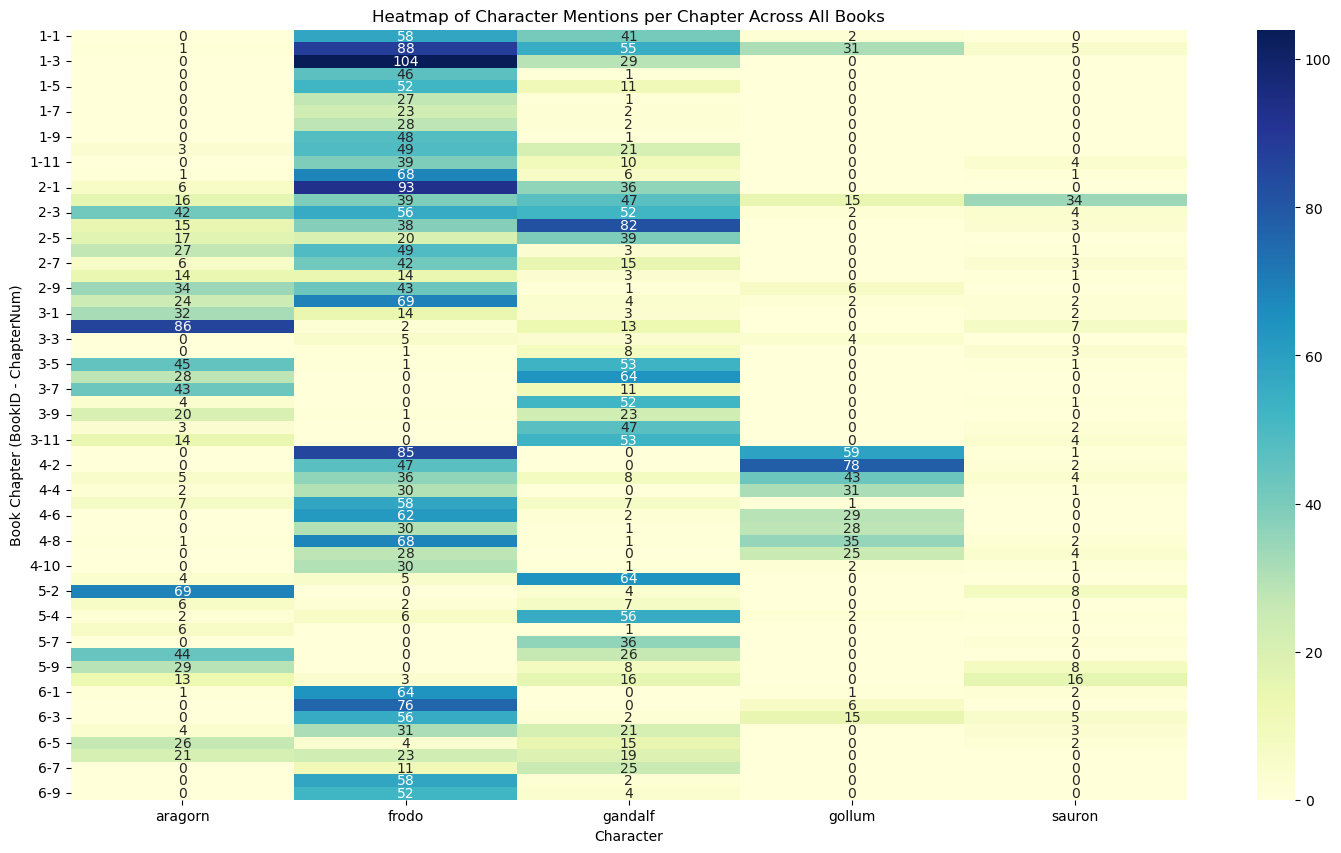

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume character_pivot_complete is already filled and indexed correctly
plt.figure(figsize=(18, 10))
sns.heatmap(character_pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of Character Mentions per Chapter Across All Books')
plt.xlabel('Character')
plt.ylabel('Book Chapter (BookID - ChapterNum)')
plt.show()


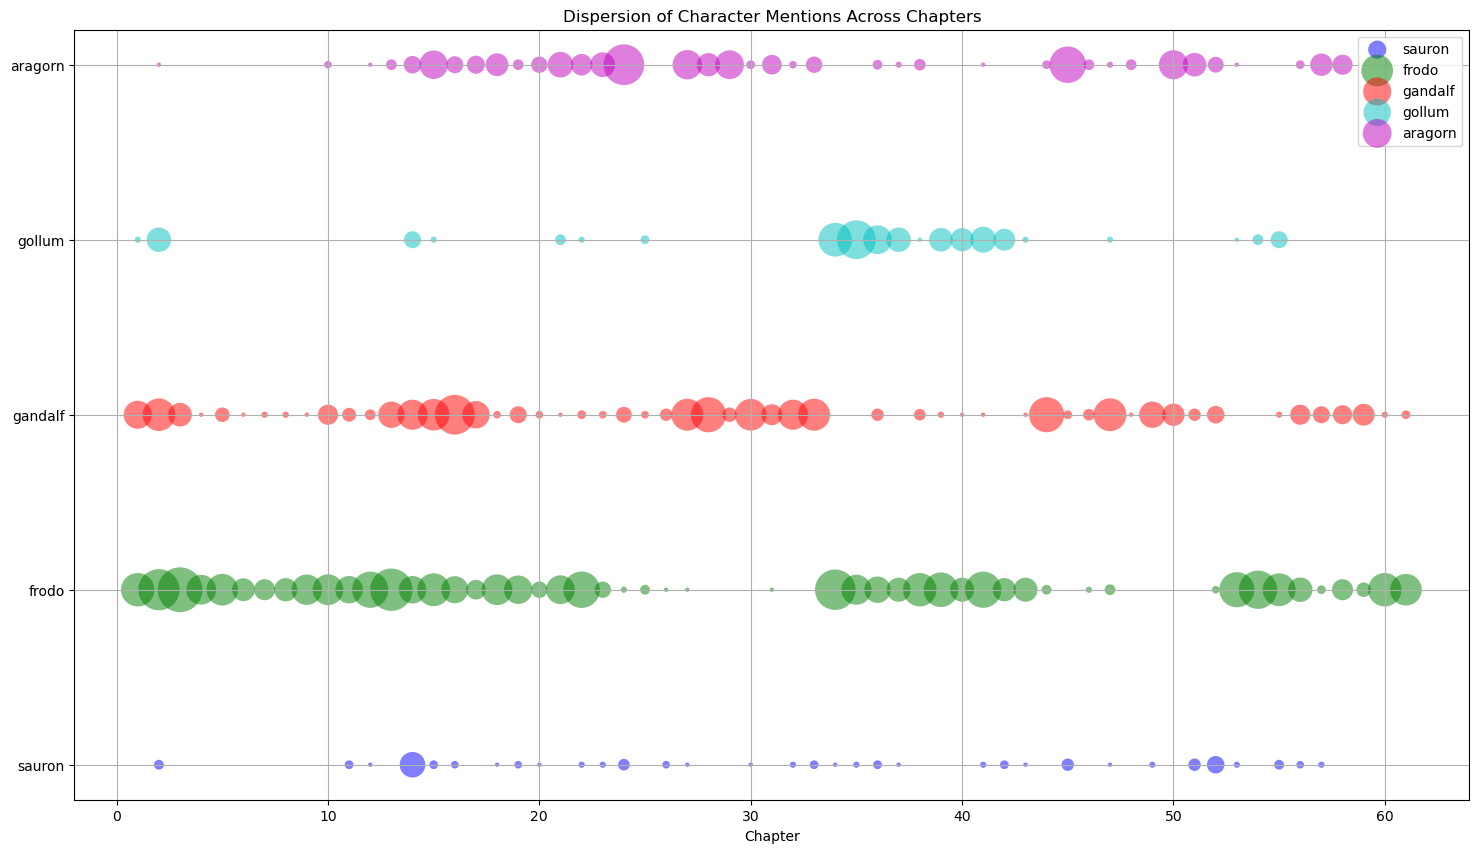

In [223]:
# Dispersion Plot
from matplotlib.collections import EventCollection

fig, ax = plt.subplots(figsize=(18, 10))
colors = ['b', 'g', 'r', 'c', 'm']
x_positions = np.arange(1, 62)  # Assuming 61 chapters linearly aligned

for idx, character in enumerate(characters):
    y_positions = character_pivot[character]
    ax.scatter(x_positions, [idx] * len(y_positions), c=colors[idx], label=character, alpha=0.5, edgecolors='none', s=y_positions*10)

ax.set_yticks(range(len(characters)))
ax.set_yticklabels(characters)
ax.set_xlabel('Chapter')
ax.set_title('Dispersion of Character Mentions Across Chapters')
plt.legend()
plt.grid(True)
plt.show()


## RIF 1

#### Each cluster can be seen as a reflection of the various narrative arcs and their emotional intensities, which align closely with the unfolding events and their significance within the broader context of the story. For instance, chapters that cluster with higher intensity of sentiment are likely to correspond with moments of significant conflict or climax, such as the Battle of Helm's Deep or the Siege of Gondor. These chapters show a heightened emotional response, reflecting the peril and bravery in the face of overwhelming odds. The clustering might show that these emotionally charged chapters are closely linked, suggesting a narrative continuity in terms of thematic and emotional buildup. Conversely, chapters that group together with a more subdued sentiment may correspond to the earlier parts of the books, such as the fellowship's time in the Shire or Rivendell, where the tone is more reflective, filled with moments of preparation and foreboding rather than direct conflict. These clusters would indicate a calmer period in the narrative, where character development takes precedence and the groundwork for the ensuing drama is laid.

## RIF 2

####

## RIF 3

#### Character Mentions and Story Development: The heatmap of character mentions per chapter across all books vividly illustrates how central characters are woven into the narrative fabric of the series. For instance, Frodo and Gandalf are consistently mentioned across the series, underscoring their pivotal roles. In contrast, characters like Gollum and Sauron have spikes in mentions that correspond to key plot developments. This pattern not only highlights the narrative focus shifting between characters but also aligns with their roles and transformations—Gollum's increasing importance as the story progresses towards its climax, and Sauron's omnipresence that crescendos as the threat he poses grows.

#### Dispersion of Character Mentions: The dispersion plot further underscores the narrative structure, showing where each character's presence is concentrated within the books. Frodo’s steady mentions across the series reflect his role as the central protagonist, while spikes for characters like Aragorn align with crucial leadership moments and battles, reflecting the ebb and flow of the storyline and the characters’ integral moments.

# INTERPRETATION

#### I found it interesting that TF-IDF highlights the significance of specific terms like "Mordor," "Gondor," and "Hobbit" across the trilogy, pinpointing where Tolkien accentuates key themes or plot shifts. This method reveals how Tolkien stages the narrative, emphasizing the growing menace of Mordor as the fellowship approaches, thus tracking the rising tension and conflict. Word2Vec extends this by exploring semantic relationships, such as linking "Sauron" with "evil," or "Aragorn" with "king," showing how Tolkien connects different narrative elements through language. The association of "ring" with "burden" through Word2Vec underscores the profound theme of power and corruption, central to the plot. Sentiment analysis across the chapters provides insight into the emotional pacing of the story, corresponding with major plot developments and character arcs. The heatmap of character mentions quantitatively reflects the narrative focus, notably on characters like Aragorn during pivotal moments, aligning with his role as a leader. Similarly, the frequent mentions of Frodo and Sam highlight their central role and the emotional rollercoaster they endure, marked by significant highs and lows in sentiment as they approach Mordor. Tolkien’s profound philological expertise is evident in the sophisticated language and deep mythological constructs within Middle-earth. The layered narrative analysis through these advanced tools shows how Tolkien uses language not just to tell a story but to enrich the reader’s immersion into the world he created. Words like "precious" reflect the dual obsession of Gollum (who was mentioned significantly through the 2nd part) and the corruptive nature of the Ring, adding layers of meaning and emotional resonance to the narrative. It demonstrates Tolkien's ability to weave complex narratives that combine character development, thematic exploration, and linguistic precision. These insights not only deepen our appreciation of his work but also showcase the potential of analytical tools to uncover new perspectives in literary studies.